In [1]:
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [4]:
def epmscore(data, o1, o2, c1, c2):
    mu = np.mean(data)
    Fo1 = (np.mean(data[o1]) - mu)/mu
    Fo2 = (np.mean(data[o2]) - mu)/mu
    Fc1 = (np.mean(data[c1]) - mu)/mu
    Fc2 = (np.mean(data[c2]) - mu)/mu
    
    A = 0.25*(np.abs(Fo1 - Fc1) + np.abs(Fo1 - Fc2) + np.abs(Fo2 - Fc1) + np.abs(Fo2 - Fc2))
    B = 0.5*(np.abs(Fo1 - Fo2) + np.abs(Fc1 - Fc2))
    return (A - B)/(A + B)

In [8]:
mousenums

['230', '355', '358', '362', '673', '674', '816', '825']

In [7]:
realscores = np.zeros((0, 1))
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    numCells = calc.shape[1]
    mscores = np.zeros((numCells, 1))
    print(numCells)
    
    for k in range(numCells):
        mscores[k] = epmscore(calc[:, k], behav['o1Ind'].flatten(), behav['o2Ind'].flatten(), 
                         behav['c1Ind'].flatten(), behav['c2Ind'].flatten())
    realscores = np.vstack((realscores, mscores))

111
104
123
117
102
61
120
119


In [8]:
realscores.shape

(857, 1)

In [18]:
bootscores = np.zeros((0))
numTrials = 100

for mouse in mousenums:
    print(mouse)
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    # calc = neur['C_raw']
    
    ################
    # variance threshold code #
    calc = getcalc(foldnames, mouse, 'epm')
    ################
    
    numCells = calc.shape[1]
    length = calc.shape[0]
    mscores = np.zeros((numCells, numTrials))
    for k in range(numCells):
        for trial in range(numTrials):
            num_o1 = np.size(behav['o1Ind'])
            num_o2 = np.size(behav['o2Ind'])
            num_c1 = np.size(behav['c1Ind'])
            num_c2 = np.size(behav['c2Ind'])
            inds = np.hstack((behav['o1Ind'][0], behav['o2Ind'][0], behav['c1Ind'][0], behav['c2Ind'][0]))
            
            order = np.random.permutation(inds)
            o1 = order[0:num_o1]
            o2 = order[num_o1:num_o1 + num_o2]
            c1 = order[num_o1 + num_o2:num_o1 + num_o2 + num_c1]
            c2 = order[num_o1 + num_o2 + num_c1:num_o1 + num_o2 + num_c1 + num_c2]
            mscores[k, trial] = epmscore(calc[:, k], o1, o2, c1, c2)
    bootscores = np.hstack((bootscores, mscores.flatten()))

230
355
358
362
673
674
816
825


In [20]:
ranksums(bootscores.flatten(), realscores.flatten())

RanksumsResult(statistic=-15.619702908480283, pvalue=5.3454116597413744e-55)

In [25]:
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = 'Arial'
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 32})

In [29]:
bins = np.linspace(-1, 1, 41)

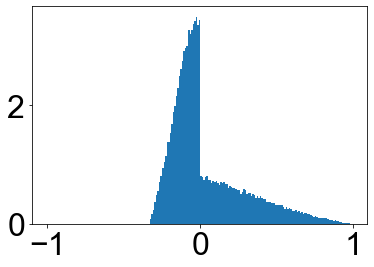

In [32]:
boothistfine = plt.hist(bootscores, density = True, bins = np.arange(-1, 1, 0.01))

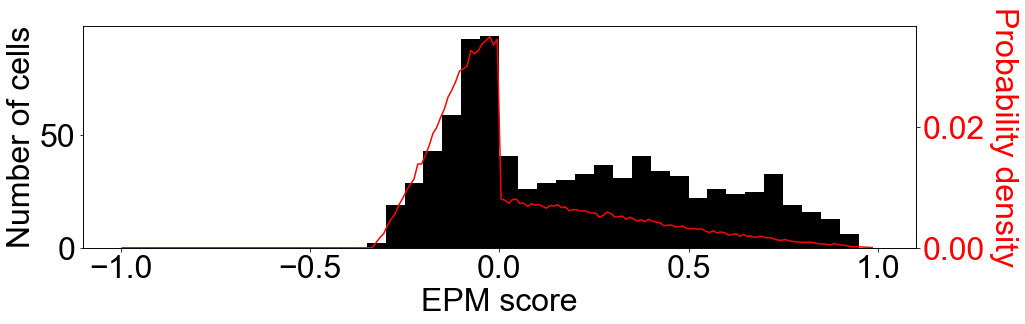

In [34]:
plt.figure(figsize=(15, 5))
realhist = plt.hist(realscores, bins = bins, color = 'k')
ax = plt.gca()
ax.set_ylabel('Number of cells')
ax.set_xlabel('EPM score')
#ax.set_xlim(-1, 1)
ax2 = ax.twinx()
ax2.plot(boothistfine[1][:-1] + 0.005, boothistfine[0]*0.01, 'r')
ax2.set_ylabel('Probability density', rotation = -90, va = 'bottom', color = 'r')
#ax2.plot(boothistfine[1][:-1] + 0.005, boothistfine[0]*np.max(realhist[0])/np.max(boothistfine[0]), c = 'r')
ax2.tick_params(axis = 'y', labelcolor = 'r')
ax2.set_ylim(0, ax2.get_ylim()[1])
plt.tight_layout()
#plt.savefig('epm-score.png')

In [38]:
d = {}
d['boothistfine_points'] = boothistfine[1][:-1] + 0.005
d['boothistfine_values'] = boothistfine[0]*0.01
d['realhist_bins'] = realhist[1]
d['realhist_values'] = realhist[0]
#sio.savemat('fig1h_v3-epmscore.mat', d)